# End to End Project




This checklist can guide you through your Machine Learning projects. There are eight main steps: 

1. Frame the problem and look at the big picture.
2. Get the data.
3. Explore the data to gain insights.
4. Prepare the data to better expose the underlying data patterns to Machine Learning algorithms. 
5. Explore many different models and short-list the best ones.
6. Fine-tune your models and combine them into a great solution.
7. Present your solution.
8. Launch, monitor, and maintain your system.

Performance measure

+ Root Mean Square Error(RMSE)

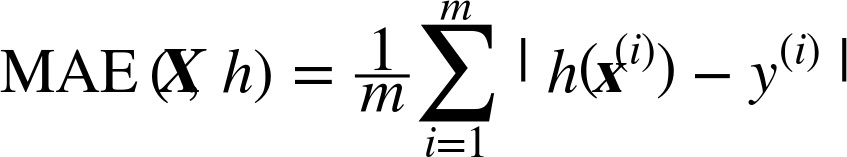

+ m is the number of instances in the dataset you are measuring the RMSE on
+ x(<sup>i</sup>) is a vector of all the feature values (excluding the label) of the ith instance in the dataset, and y(<sup>i</sup>) is its label (the desired output value for that instance).
+ X is a matrix containing all the feature values (excluding labels) of all instances in the dataset.
+ h is your system’s prediction function, also called a hypothesis
+ RMSE(X,h) is the cost function measured on the set of examples using your hypothesis h.

+ We use lowercase italic font for scalar values (such as m or y(<sup>i</sup>)) and function names (such as h), lowercase bold font for vectors (such as x(<sup>i</sup>)), and uppercase bold font for matrices (such as X).


+ Mean Absolute Error

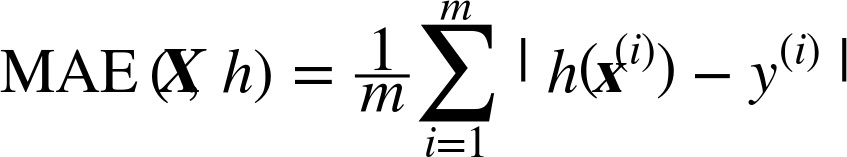

Both the RMSE and the MAE are ways to measure the distance between two vectors: the vector of predictions and the vector of target values. Various distance measures, or norms, are possible:

+ Computing the root of a sum of squares (RMSE) corresponds to the Euclidian norm: it is the notion of distance you are familiar with. It is also called the ℓ2 norm, noted ∥ · ∥2 (or just ∥ · ∥).

+ Computing the sum of absolutes (MAE) corresponds to the ℓ1 norm, noted ∥ · ∥1. It is sometimes called the Manhattan norm because it measures the distance between two points in a city if you can only travel along orthogonal city blocks.

+ More generally, the ℓ<sub>k</sub> norm of a vector v containing n elements is defined as  

+ ℓ0 just gives the cardinality of the vector (i.e., the number of elements), and ℓ∞ gives the maximum absolute value in the vector.

+ The higher the norm index, the more it focuses on large values and neglects small ones. 

+ This is why the RMSE is more sensitive to outliers than the MAE. But when outliers are exponentially rare (like in a bell-shaped curve), the RMSE performs very well and is generally preferred.
